In [1]:
#%matplotlib notebook

In [2]:
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#1.0 OBTAIN INITIAL FILES
    #1.01 Carpetas de Investigación
        #1.01.01 Download file from the following url
        #https://datos.cdmx.gob.mx/explore/dataset/carpetas-de-investigacion-pgj-cdmx/download/?format=csv&timezone=America/Mexico_City&use_labels_for_header=true
    
        #1.01.02 Save as "Carpetas de Investigación PGJ CDMX.csv" in current folder
    
    #1.02 Alcaldías in CDMX
    
 

In [4]:
#2. UPLOAD IN PYTHON FILES

#2.01 Carpetas de Investigación (PGJ Files)
PGJ_input=pd.read_csv("Carpetas de Investigación PGJ CDMX.csv",sep=";")
#PGJ_input.head()

#2.02 Alcaldías (Town Halls)
Alcaldias_input=pd.read_csv("Alcaldías.csv",sep=";")
#Alcaldias_input

#2.03 Budget information
#2.04 Demographic information
#2.05 Crime Clasification
PGJ_Class=pd.read_csv("Clasificación Delitos.csv")
PGJ_Class

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 11: invalid continuation byte

In [5]:
# 3.0 Adjust the Town Halls names (upper cases, no accents)

#3.01 From Alcaldias file.
    #3.01.02 Define variable alcaldias in order to have a list of all the "Alcaldias" in CDMX
alcaldias=Alcaldias_input["NOMBRE"]
alcaldias=alcaldias.str.replace("Á","A")
alcaldias=alcaldias.str.replace("á","a")
alcaldias=alcaldias.str.replace("É","E")
alcaldias=alcaldias.str.replace("é","e")
alcaldias=alcaldias.str.replace("Í","I")
alcaldias=alcaldias.str.replace("í","i")
alcaldias=alcaldias.str.replace("Ó","O")
alcaldias=alcaldias.str.replace("ó","o")
alcaldias=alcaldias.str.replace("Ú","u")
alcaldias=alcaldias.str.replace("ú","u")
alcaldias=alcaldias.str.replace(".","")
alcaldias = [alcaldia.upper() for alcaldia in alcaldias]
alcaldias

#3.02 From Budget File

#3.03 From Dempographics file

['TLALPAN',
 'TLAHUAC',
 'VENUSTIANO CARRANZA',
 'CUAUHTEMOC',
 'IZTAPALAPA',
 'AZCAPOTZALCO',
 'BENITO JUAREZ',
 'CUAJIMALPA DE MORELOS',
 'IZTACALCO',
 'GUSTAVO A MADERO',
 'MIGUEL HIDALGO',
 'LA MAGDALENA CONTRERAS',
 'COYOACAN',
 'MILPA ALTA',
 'ALVARO OBREGON',
 'XOCHIMILCO']

In [6]:
#4.0 Filter only the data needed

#4.01 Alcaldias in CMX
    #4.01.01 From the PGJ files
PGJ_alcaldias=PGJ_input.loc[PGJ_input["alcaldia_hechos"].isin(alcaldias),:]
#PGJ_alcaldias

    #4.01.02 From the Budget file

    #4.01.03 from the Demographics file

In [7]:
# 4.02 Years that will be included in the analysis of crime rates, for the rest of the information
Primer_año=2016
Ultimo_año=2019

# 4.02.01 The historic data will only be considered in the PGJ files to review historic changes in the crime rates
PGJ_Hist=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]>Primer_año-1,:]
PGJ_Hist=PGJ_Hist.loc[PGJ_Hist["año_hechos"]<Ultimo_año+1,:]
#PGJ_Hist.head()

#4.02.02 The budget used will be last year's Budget in order to have full year of Crime Vs Full budget usage
#4.02.03 The Demographic information will be from the last census registered


In [8]:
#5.0 Define the Crimes that will be tracked to narrow the scope

#5.01 For these exercise, we will only review the Top 30 crimes from 2018
PGJ_2018=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2018,:]
PGJ_Top30_2018=PGJ_2018.groupby(["delito"],as_index=False).count()
PGJ_Top30_2018=(PGJ_Top30_2018.sort_values(by ="año_hechos",ascending=False)).head(30)
PGJ_Top30_2018=PGJ_Top30_2018["delito"]
PGJ_Top30_2018=PGJ_Top30_2018.tolist()
#PGJ_Top30_2018

In [9]:
#6.0 Filter only the crimes included in the Top 30 from 2018
PGJ_Top_Hist=PGJ_Hist.loc[PGJ_Hist["delito"].isin(PGJ_Top30_2018),:]
#PGJ_201X Separate by Year 
PGJ_2016=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2016,:]
PGJ_2017=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2017,:]
PGJ_2018=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2018,:]
PGJ_2019=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2019,:]

#PGJ_Top_Hist["delito"].unique() #--> Should give the Top 30 crimes in 2018
#PGJ_Top_Hist["año_hechos"].unique() #--> Should give the years from Primer_año to Ultimo_año

PGJ_Top_Delitos_2016=PGJ_2016.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
PGJ_Top_Delitos_2017=PGJ_2017.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
PGJ_Top_Delitos_2018=PGJ_2018.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
PGJ_Top_Delitos_2019=PGJ_2019.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]


In [10]:
Delitos_Alcaldia_2016 = PGJ_Top_Delitos_2016.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2016
Delitos_Alcaldia_2016_Resume = Delitos_Alcaldia_2016['delito'].reset_index()
Delitos_Alcaldia_2016_Resume = Delitos_Alcaldia_2016_Resume.rename(columns = {"delito":"Delitos_2016"})
Delitos_Alcaldia_2016_Resume_df = pd.DataFrame(Delitos_Alcaldia_2016_Resume)
#Delitos_Alcaldia_2016_Resume_df
Total_Delitos_2016 = Delitos_Alcaldia_2016["delito"].sum()
Total_Delitos_2016

149532

In [11]:
Delitos_Alcaldia_2017 = PGJ_Top_Delitos_2017.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2017
Delitos_Alcaldia_2017_Resume = Delitos_Alcaldia_2017['delito'].reset_index()
Delitos_Alcaldia_2017_Resume = Delitos_Alcaldia_2017_Resume.rename(columns = {"delito":"Delitos_2017"})
Delitos_Alcaldia_2017_Resume_df = pd.DataFrame(Delitos_Alcaldia_2017_Resume)
#Delitos_Alcaldia_2017_Resume_df
Total_Delitos_2017 = Delitos_Alcaldia_2017["delito"].sum()
Total_Delitos_2017

178743

In [12]:
Delitos_Alcaldia_2018 = PGJ_Top_Delitos_2018.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2018
Delitos_Alcaldia_2018_Resume = Delitos_Alcaldia_2018['delito'].reset_index()
Delitos_Alcaldia_2018_Resume = Delitos_Alcaldia_2018_Resume.rename(columns = {"delito":"Delitos_2018"})
Delitos_Alcaldia_2018_Resume_df = pd.DataFrame(Delitos_Alcaldia_2018_Resume)
#Delitos_Alcaldia_2018_Resume_df
Total_Delitos_2018 = Delitos_Alcaldia_2018["delito"].sum()
Total_Delitos_2018

198627

In [13]:
Delitos_Alcaldia_2019 = PGJ_Top_Delitos_2019.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2019
Delitos_Alcaldia_2019_Resume = Delitos_Alcaldia_2019['delito'].reset_index()
Delitos_Alcaldia_2019_Resume = Delitos_Alcaldia_2019_Resume.rename(columns = {"delito":"Delitos_2019"})
Delitos_Alcaldia_2019_Resume_df = pd.DataFrame(Delitos_Alcaldia_2019_Resume)
#Delitos_Alcaldia_2019_Resume_df
Total_Delitos_2019 = Delitos_Alcaldia_2019["delito"].sum()
Total_Delitos_2019

69182

In [14]:
#7.0 HISTORIC INFORMATION FROM CRIMES
#7.01 Create table with total crimes for CDMX (for the Top 30 2018 Crimes)
años_total = {"Total delitos" : {'2016':Total_Delitos_2016, '2017':Total_Delitos_2017,
           '2018':Total_Delitos_2018, '2019':Total_Delitos_2019}}
años_total_df = pd.DataFrame(años_total)
años_total_df

,Total delitos
2016,149532
2017,178743
2018,198627
2019,69182


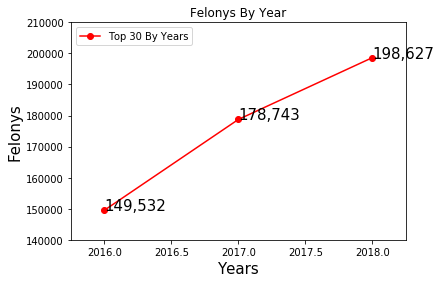

In [15]:
#7.01.01 Create Graph for Total Crimes for CDMX
x_axis = np.arange(2016,2019,1)
points = [149532, 178743, 198627]
Delitos_año = plt.plot(x_axis,points, color = "red", marker ="o", label = "Top 30 By Years")

plt.legend(loc="upper left", fontsize=10)
plt.ylabel('Felonys', fontsize = 15)
plt.xlabel('Years', fontsize = 15)
plt.title("Felonys By Year")
plt.annotate('149,532', xy=(2016, 149532), fontsize= 15)             
plt.annotate('178,743', xy=(2017, 178743), fontsize= 15) 
plt.annotate('198,627', xy=(2018, 198627), fontsize= 15)
plt.ylim(140000,210000)
plt.xlim(2015.75,2018.25)

plt.savefig('años_total_df.png', bbox_inches='tight')

plt.show()
     

In [16]:
#7.02.01 Create table with historic evolution of each of the Top 30 2018 Crimes
Merge_Table1 = pd.merge(Delitos_Alcaldia_2016_Resume_df, Delitos_Alcaldia_2017_Resume_df, 
                        on ="alcaldia_hechos")
#Merge_Table1.head()
Merge_Table2 = pd.merge(Merge_Table1, Delitos_Alcaldia_2018_Resume_df, 
                        on ="alcaldia_hechos")
#merge_table2.head()
Merge_Alcaldias= pd.merge(Merge_Table2, Delitos_Alcaldia_2019_Resume_df, on = "alcaldia_hechos")
Merge_Alcaldias


,alcaldia_hechos,Delitos_2016,Delitos_2017,Delitos_2018,Delitos_2019
0,ALVARO OBREGON,9964,11668,13757,5362
1,AZCAPOTZALCO,7918,9274,9974,3311
2,BENITO JUAREZ,13699,17023,18853,6186
3,COYOACAN,11164,12704,14076,4659
4,CUAJIMALPA DE MORELOS,2141,2345,2690,1077
5,CUAUHTEMOC,23669,27887,30784,9975
6,GUSTAVO A MADERO,14063,17868,19675,7045
7,IZTACALCO,6371,7812,8820,3081
8,IZTAPALAPA,22160,26073,28709,10323
9,LA MAGDALENA CONTRERAS,2431,2632,2890,1268


In [17]:
#Export CSV for information available to teamates 
export_csv = Merge_Alcaldias.to_csv ("Delitos Por Año.csv")

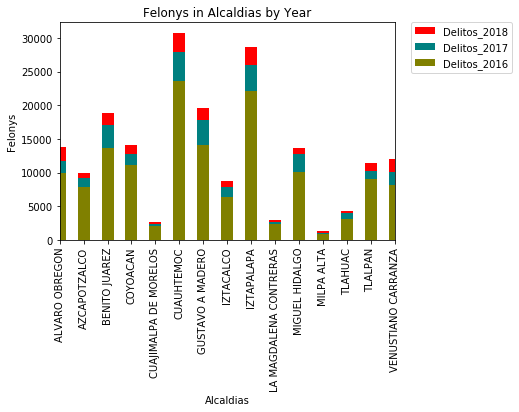

In [18]:
#7.02.02 Create Graph for the historic evolution of each of the Top 30 2018 Crimes
ax = plt.gca()

Merge_Table2.plot(kind='bar',x='alcaldia_hechos',y='Delitos_2018', color='red', ax=ax)
Merge_Table2.plot(kind='bar',x='alcaldia_hechos',y='Delitos_2017', color='teal', ax=ax)
Merge_Table2.plot(kind='bar',x='alcaldia_hechos',y='Delitos_2016',color='olive', ax=ax)



plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(x='alcaldia_hechos', rotation='vertical')
plt.title("Felonys in Alcaldias by Year")
plt.xlim(0,14)
plt.xlabel("Alcaldias")
plt.ylabel("Felonys")
plt.savefig('Merge_Table2.png', bbox_inches='tight')


plt.show()